# **`Alzheimer’s Disease Classification`** 
- **`using ML and DL algorithms`**


**Alzheimer’s disease**
- Alzheimer’s disease is a progressive and irreversible disorder that slowly destroys memory, thinking skills, and other important mental functions that will eventually remove a person’s ability to carry out simple tasks. 
- Alzheimer’s disease is the most common cause of dementia, which is a `group of brain disorders that cause the loss of intellectual and social skills`. There is `no known cure for Alzheimer’s disease`, but there are `medications and management strategies that may temporarily improve symptoms`. 



#### ***Data preprocessing***
- Data used in the preparation of this report was obtained from the Alzheimer’s Disease Neuroimaging Initiative (ADNI) database (http://adni.loni.usc.edu). 
- After downloading the images from ADNI database, we need to `remove unnecessary details of brain MR images that might cause poor training of our classification model`, cortical reconstruction and volumetric segmentation was performed with the Free-Surfer image analysis suite
- After we have pre-processed images using `free-surfer software`, we need to extract the features from the pre-processed images using `the frees-surfer commands`.
- **Frees-surfer Command** 
    - ***asegstats2table:-***   It produces the volumetric data from different cortical structures of the brain segmented.
    - ***aparcstats2table:-*** It produces the area or thickness data from different subcortical structures of left part of the brain segmented

- After collecting extracted features from the pre-processed images , we prepare `4 csv files which contains subject features of CN and AD, AD and MCI, MCI and CN`. 


#### 1. CN  :: (Cognitively Normal)
- ***(early stage)***
- People suffering from Alzheimer’s disease can appear to be healthy and functioning independently - participating in social activities, driving themselves, or working. Despite looking healthy, they may actually be having trouble making sense of their surroundings and experience memory lapses, like forgetting familiar words or locating everyday objects. This stage is often mistaken for normal aging. 

#### 2. MCI :: (Mild Cognitive Impairment) 
- ***(middle stage)*** 
- This stage is typically the longest stage and can last for several years. In this stage, the degeneration of the brain worsens and spreads to other areas that control language, reasoning, sensory processing and thought. The damage to nerve cells in the brain makes it difficult to express thoughts and perform routine tasks. You may notice in this stage, someone with Alzheimer’s will confuse words, get frustrated or angry, or act out. 

#### 3. AD  :: 
- ***(late stage)***
- This is the final stage of the disease where the damage to brain’s nerve cells is widespread and people may lose their motor coordination and the ability to walk, speak, feed themselves, and recognize others. Full-time care is usually required during this stage. 


### ***Import Necessary libraries***

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# **`A. CN and AD Classification`**
- Two Way

###  ***Load Dataset***

In [2]:
data = pd.read_csv('CN_AD.csv')
data.head()

,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_area,rh_supramarginal_area,rh_frontalpole_area,rh_temporalpole_area,rh_transversetemporal_area,rh_insula_area,rh_WhiteSurfArea_area,BrainSegVolNotVent.2,eTIV.1,category
0,002_S_0295,23090.0,1020.1,13583.2,57689.5,6969.1,3218.3,4556.4,2030.0,2086.8,...,3180,3186,267,461,266,2741,79747.8,1091729,1.627656e+06,0
1,002_S_0413,14953.7,841.5,11062.3,46273.3,6061.1,3376.1,3502.1,1390.6,2545.5,...,3562,3288,296,424,313,1911,80805.6,1035836,1.586448e+06,0
2,002_S_0559,16334.9,1261.3,12688.1,52498.2,6931.2,3402.5,4248.9,1774.8,2673.0,...,3891,4059,300,487,310,2342,87450.3,1127258,1.660782e+06,0
3,002_S_1261,14344.1,867.0,11743.8,52665.4,6080.0,3152.7,3615.4,1713.3,1177.5,...,3086,3220,337,349,319,2249,76685.4,1008174,1.456087e+06,0
4,002_S_1280,11270.4,405.6,13772.4,44625.8,5537.0,3454.3,4499.0,1735.1,1182.5,...,3108,4065,275,451,319,2286,74440.0,954403,1.395987e+06,0


In [3]:
data.shape

(160, 142)

In [4]:
data.describe()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiortemporal_area,rh_supramarginal_area,rh_frontalpole_area,rh_temporalpole_area,rh_transversetemporal_area,rh_insula_area,rh_WhiteSurfArea_area,BrainSegVolNotVent.2,eTIV.1,category
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,1.600000e+02,1.600000e+02,160.00000
mean,23220.814375,1239.240000,12375.664375,49310.490000,6345.040000,3272.182500,4054.088125,1745.510000,2001.5550,2107.286875,...,3502.518750,3429.662500,296.512500,452.856250,313.925000,2336.743750,80255.681875,1.014339e+06,1.540255e+06,0.50000
std,12973.943707,904.371099,1693.067505,5225.087766,679.931718,601.107702,638.321723,249.103923,674.0464,688.025086,...,468.116915,497.717544,36.075914,63.955551,50.188769,357.254842,8153.947803,1.076347e+05,1.723378e+05,0.50157
min,6169.900000,200.300000,7697.300000,34648.900000,4840.700000,2135.500000,2483.600000,1129.800000,835.6000,1032.000000,...,2627.000000,2255.000000,194.000000,272.000000,209.000000,1716.000000,61848.800000,7.407600e+05,1.145850e+06,0.00000
25%,13530.800000,711.800000,11257.200000,45990.475000,5841.825000,2925.825000,3674.125000,1608.625000,1461.7250,1647.925000,...,3167.250000,3044.250000,274.750000,413.500000,280.500000,2046.500000,74433.525000,9.343288e+05,1.424844e+06,0.00000
50%,21135.650000,981.650000,12381.850000,48460.950000,6369.200000,3166.250000,3959.500000,1752.300000,1952.6500,2000.850000,...,3435.000000,3419.500000,294.500000,453.000000,309.000000,2284.500000,79136.050000,1.028422e+06,1.532082e+06,0.50000
75%,28847.725000,1544.475000,13527.150000,52175.300000,6756.475000,3520.875000,4370.525000,1899.525000,2468.4250,2390.300000,...,3794.000000,3802.000000,314.250000,487.000000,341.250000,2540.500000,86737.250000,1.081428e+06,1.653414e+06,1.00000
max,77457.300000,7025.900000,16911.700000,63557.600000,8068.200000,6947.000000,6365.400000,2378.800000,4223.5000,5154.400000,...,5443.000000,4889.000000,405.000000,622.000000,475.000000,3399.000000,101210.000000,1.291572e+06,2.040867e+06,1.00000


In [5]:
data.isnull().sum()

Measure:volume                  0
Left-Lateral-Ventricle          0
Left-Inf-Lat-Vent               0
Left-Cerebellum-White-Matter    0
Left-Cerebellum-Cortex          0
                               ..
rh_insula_area                  0
rh_WhiteSurfArea_area           0
BrainSegVolNotVent.2            0
eTIV.1                          0
category                        0
Length: 142, dtype: int64

### ***Seperate Dependent `(y)` and Independent `(x)` variables***

In [6]:
x = data.drop(columns = ['category','Measure:volume'], axis = 1)
y = data['category']

### ***Scaling data in between 0 to 1***
- `MinMaxScaler`

In [7]:
x_new = x.copy()
def min_max_scale(col, x_new):
    mms = MinMaxScaler()
    x_new[col] = mms.fit_transform(x_new[[col]])
    return x_new

In [8]:
for col in list(x_new.columns):
    x_new = min_max_scale(col, x_new)

In [9]:
x_new.head()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiorparietal_area,rh_superiortemporal_area,rh_supramarginal_area,rh_frontalpole_area,rh_temporalpole_area,rh_transversetemporal_area,rh_insula_area,rh_WhiteSurfArea_area,BrainSegVolNotVent.2,eTIV.1
0,0.237350,0.120107,0.638772,0.797013,0.659458,0.225044,0.533979,0.720737,0.369314,0.179750,...,0.404894,0.196378,0.353455,0.345972,0.540000,0.214286,0.609031,0.454737,0.637185,0.538320
1,0.123217,0.093940,0.365189,0.402107,0.378125,0.257841,0.262378,0.208807,0.504708,0.106855,...,0.446839,0.332031,0.392179,0.483412,0.434286,0.390977,0.115865,0.481611,0.535711,0.492278
2,0.142592,0.155444,0.541630,0.617437,0.647715,0.263327,0.454763,0.516413,0.542342,0.552397,...,0.366443,0.448864,0.684890,0.502370,0.614286,0.379699,0.371955,0.650425,0.701688,0.575332
3,0.114665,0.097676,0.439150,0.623221,0.383981,0.211410,0.291566,0.467174,0.100918,0.272681,...,0.348675,0.162997,0.366363,0.677725,0.220000,0.413534,0.316696,0.376935,0.485491,0.346626
4,0.071548,0.030078,0.659305,0.345118,0.215740,0.274093,0.519192,0.484628,0.102394,0.062197,...,0.416545,0.170810,0.687168,0.383886,0.511429,0.413534,0.338681,0.319889,0.387869,0.279478


### ***Split data into `train` and `test`***

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

### ***Feature Importance***
- Feature importance gives you a score for each feature of your data, the higher the score more  important or relevant is the feature towards your output variable.
- we can use it for regression as well as classification
- for regression problem `ExtraTreesRegressor`
- for classification problem `ExtraTreesClassifier`

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
etc = ExtraTreesClassifier()
etc.fit(x_new, y)

ExtraTreesClassifier()

In [13]:
importance = etc.feature_importances_
columns = x_new.columns

In [14]:
df_impot = pd.DataFrame({'Columns' : columns, 'Importance' : importance})
df_imp_60 = df_impot.sort_values(by = 'Importance', ascending = False).head(60)

In [15]:
df_imp_60.head()

,Columns,Importance
11,Left-Hippocampus,0.054968
27,Right-Amygdala,0.042246
26,Right-Hippocampus,0.041677
12,Left-Amygdala,0.034405
19,Right-Inf-Lat-Vent,0.020640


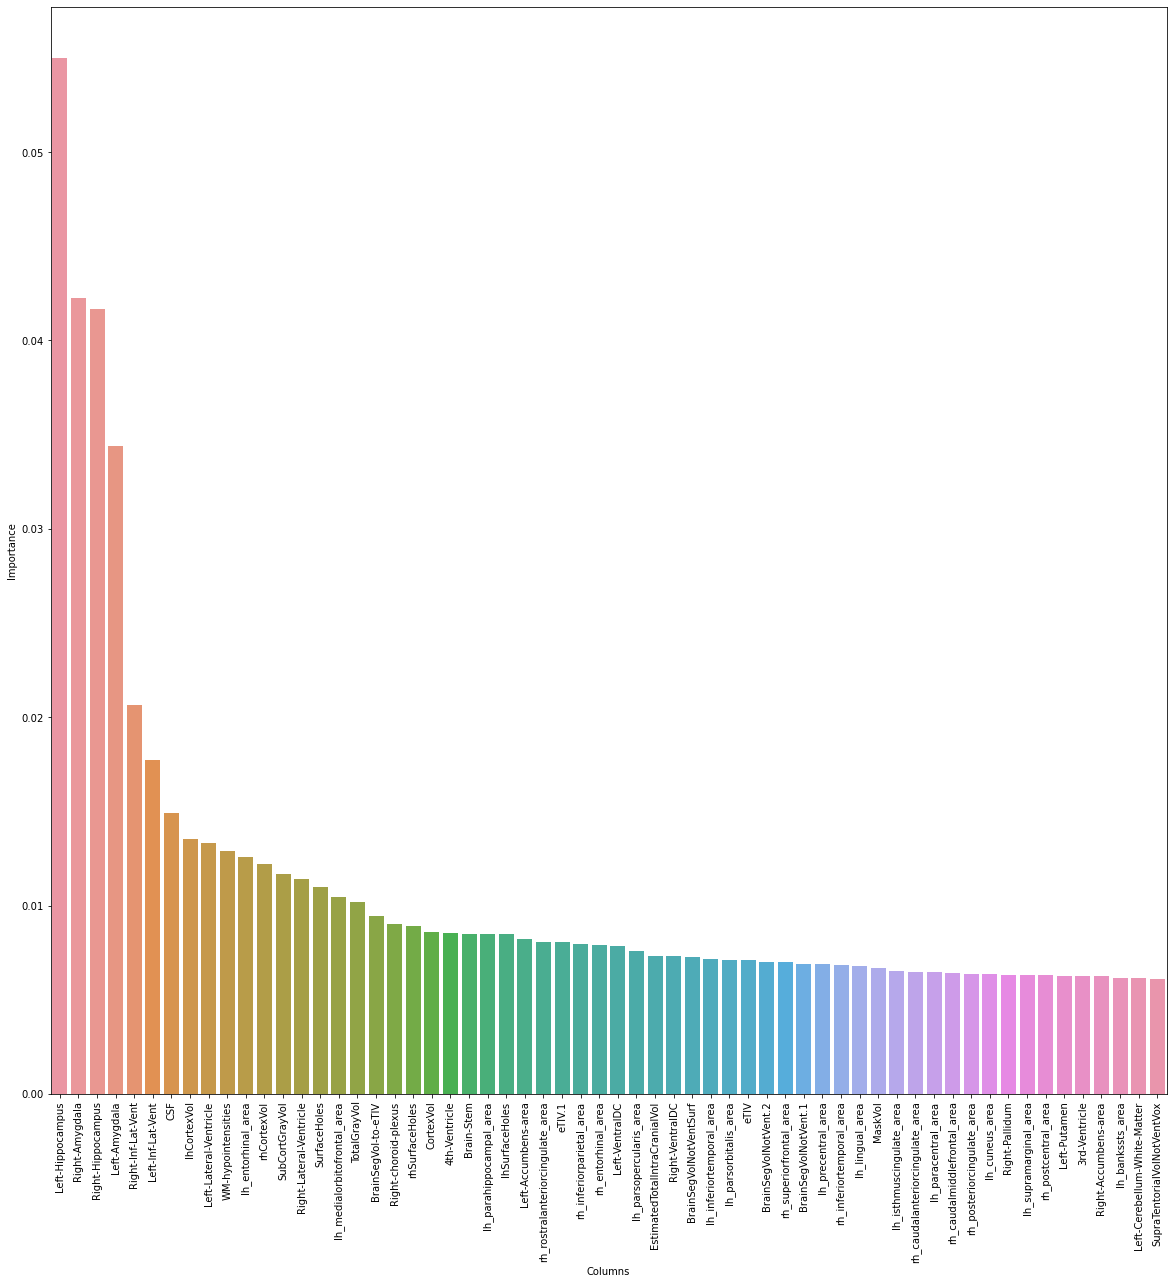

In [16]:
# plot graph
plt.figure(figsize = (20,20))
sns.barplot(x = df_imp_60.Columns, y = df_imp_60.Importance)
plt.xticks(rotation = 90)
plt.show()

### ***Classification Models***

### 1. Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 120)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.75

- **`K-Fold CV`**

In [18]:
score1 = cross_val_score(rfc, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score1.mean())
print('Standard Deviation:', score1.std())

Final Mean Accuracy:  0.8059631959003027
Standard Deviation: 0.0503608158446977


### 2. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(x_train, y_train)
y_logit_pred = logit.predict(x_test)
accuracy_score(y_test, y_logit_pred)

0.8125

- **`K-Fold CV`**

In [20]:
score2 = cross_val_score(logit, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score2.mean())
print('Standard Deviation:', score2.std())

Final Mean Accuracy:  0.8439319822967621
Standard Deviation: 0.021982670836066236


### 3. Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_gb_pred = gb.predict(x_test)
accuracy_score(y_test, y_gb_pred)

0.78125

- **`K-Fold CV`**

In [22]:
score3 = cross_val_score(gb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score3.mean())
print('Standard Deviation:', score3.std())

Final Mean Accuracy:  0.749475890985325
Standard Deviation: 0.08014584844283139


### 4. xgboost 

In [23]:
import xgboost as xgb
xgb = xgb.XGBRFClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
accuracy_score(y_test, y_xgb_pred)

0.75

- **`K-Fold CV`**

In [24]:
score4 = cross_val_score(xgb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score4.mean())
print('Standard Deviation:', score4.std())

Final Mean Accuracy:  0.7872117400419287
Standard Deviation: 0.03351020411560959


### 5. xgboost with parameters

In [25]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [26]:
classifier = xgboost.XGBClassifier()

In [27]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [28]:
rs_cv = RandomizedSearchCV(classifier, param_distributions = params, n_iter = 5, cv = 3, verbose = 3)

In [29]:
rs_cv.fit(x_new, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] min_child_weight=7, max_depth=6, learning_rate=0.15, gamma=0.1, colsample_bytree=0.5 
[CV]  min_child_weight=7, max_depth=6, learning_rate=0.15, gamma=0.1, colsample_bytree=0.5, score=0.778, total=   0.1s
[CV] min_child_weight=7, max_depth=6, learning_rate=0.15, gamma=0.1, colsample_bytree=0.5 
[CV]  min_child_weight=7, max_depth=6, learning_rate=0.15, gamma=0.1, colsample_bytree=0.5, score=0.774, total=   0.1s
[CV] min_child_weight=7, max_depth=6, learning_rate=0.15, gamma=0.1, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  min_child_weight=7, max_depth=6, learning_rate=0.15, gamma=0.1, colsample_bytree=0.5, score=0.755, total=   0.1s
[CV] min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3 
[CV]  min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, score=0.815, total=   0.1s
[CV] min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3 
[CV]  min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, score=0.755, total=   0.1s
[CV] min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3 
[CV]  min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, score=0.774, total=   0.1s
[CV] min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.4, score=0.833, total=   0.1s
[CV] min_child_weight=7, max_depth=4, lea

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.0s finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

- Best estimator parameters

In [30]:
rs_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- **`K-Fold CV`**

In [32]:
score5=cross_val_score(classifier, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score5.mean())
print('Standard Deviation:',score5.std())

Final Mean Accuracy:  0.7808059631959003
Standard Deviation: 0.05082413052338311


### 6. Linear Discrimenant Analysis
- LDA is closely related to `analysis of variance` (ANOVA) and regression analysis.
- `Linear Discriminant Analysis` **or** `Normal Discriminant Analysis` **or** `Discriminant Function Analysis` is a dimensionality reduction technique which is commonly used for the **supervised classification problems**. 
- It is used for **modeling differences in groups** i.e. **separating two or more classes**. 
- It is used to project the features in **higher dimension space into a lower dimension space**.

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test, y_lda_pred)

0.46875

- **`K-Fold CV`**

In [162]:
score6=cross_val_score(lda, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score6.mean())
print('Standard Deviation:',score6.std())

Final Mean Accuracy:  0.4392932489451477
Standard Deviation: 0.04635838931552577


### 7. SVM

In [35]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)
y_sv_pred = sv.predict(x_test)
accuracy_score(y_test, y_sv_pred)

0.78125

- **`K-Fold CV`**

In [36]:
score7 = cross_val_score(sv, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score7.mean())
print('Standard Deviation:',score7.std())

Final Mean Accuracy:  0.8312368972746332
Standard Deviation: 0.030846832221304316


### 8. Naïve Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_mnb_pred = mnb.predict(x_test)
accuracy_score(y_test, y_mnb_pred)

0.75

- **`K-Fold CV`**

In [38]:
score8 = cross_val_score(mnb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score8.mean())
print('Standard Deviation:',score8.std())

Final Mean Accuracy:  0.7873282087118566
Standard Deviation: 0.09445487060848848


## **`Models Using PCA`**
#### ***PCA (Principal Component Analysis)***
- Large datasets are increasingly widespread in many disciplines. In order to interpret such datasets, methods are required to drastically `reduce their dimensionality in an interpretable way`, such that most of the information in the data is preserved. Many techniques have been developed for this purpose, but `principal component analysis (PCA) is one of the oldest and most widely used`. Its idea is `simple—reduce the dimensionality of a dataset`, while `preserving as much ‘variability’ (i.e. statistical information) as possible`.

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(x_new)
pca_data = pca.transform(x_new)

In [40]:
pca_data.shape

# data set get reduce

(160, 10)

##### ***Split new data into train and test***
- Independent (pca_data (x)) 
- Dependent data (y) 

In [41]:
x2_train, x2_test, y2_train, y2_test = train_test_split(pca_data, y, test_size = 0.2, random_state = 0)

### ***Classification Models using pca data***
### ***`K-Fold CV`***

### 1. Random Forest

In [42]:
rfc = RandomForestClassifier(n_estimators = 120)

score = cross_val_score(rfc, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.79979035639413
Standard Deviation: 0.033114400417046774


### 2. Logistic Regression

In [43]:
logit = LogisticRegression()

score = cross_val_score(logit, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.8375262054507339
Standard Deviation: 0.02329781003238246


### 3. Gradient Boosting

In [44]:
gb = GradientBoostingClassifier()

score = cross_val_score(gb, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.7750989983694386
Standard Deviation: 0.013593445609565744


### 4. xgboost 

In [45]:
import xgboost as xgb
xgb = xgb.XGBRFClassifier()

score = cross_val_score(xgb, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.755998136501281
Standard Deviation: 0.05429514064321471


### 5. xgboost with patameters

In [46]:
score = cross_val_score(classifier, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.7558816678313534
Standard Deviation: 0.04237795420602657


### 6. Linear Discrimenant Analysis

In [47]:
lda = LinearDiscriminantAnalysis()

score = cross_val_score(lda, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.8438155136268345
Standard Deviation: 0.007412020767154585


### 7. SVM

In [48]:
from sklearn.svm import SVC

sv = SVC()
score = cross_val_score(sv, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:',score.std())

Final Mean Accuracy:  0.79979035639413
Standard Deviation: 0.045231549288032365


### ***Algorithm that gives `Max` Accuracy:-*** 
- **Without PCA:-** Logistic Regression
                        - Mean Accuracy:  84.39 %
                        - Standard Deviation: 0.0219826
    
- **With PCA:-** Linear Discrimenant Analysis
                        - Mean Accuracy:  84.38 %
                        - Standard Deviation: 0.0074120
  

# **----------------------------------------------------------------------------------**

# **`B. CN and MCI Classification`**
- Two Way

### ***Load dataset***

In [49]:
data1 = pd.read_csv('CN_MCI.csv')
data1.head()

,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_area,rh_supramarginal_area,rh_frontalpole_area,rh_temporalpole_area,rh_transversetemporal_area,rh_insula_area,rh_WhiteSurfArea_area,BrainSegVolNotVent.2,eTIV.1,category
0,002_S_0295,23090.0,1020.1,13583.2,57689.5,6969.1,3218.3,4556.4,2030.0,2086.8,...,3180,3186,267,461,266,2741,79747.8,1091729,1.627656e+06,0
1,002_S_0413,14953.7,841.5,11062.3,46273.3,6061.1,3376.1,3502.1,1390.6,2545.5,...,3562,3288,296,424,313,1911,80805.6,1035836,1.586448e+06,0
2,002_S_0559,16334.9,1261.3,12688.1,52498.2,6931.2,3402.5,4248.9,1774.8,2673.0,...,3891,4059,300,487,310,2342,87450.3,1127258,1.660782e+06,0
3,002_S_1261,14344.1,867.0,11743.8,52665.4,6080.0,3152.7,3615.4,1713.3,1177.5,...,3086,3220,337,349,319,2249,76685.4,1008174,1.456087e+06,0
4,002_S_1280,11270.4,405.6,13772.4,44625.8,5537.0,3454.3,4499.0,1735.1,1182.5,...,3108,4065,275,451,319,2286,74440.0,954403,1.395987e+06,0


In [50]:
data1.shape

(159, 142)

In [51]:
data1.describe()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiortemporal_area,rh_supramarginal_area,rh_frontalpole_area,rh_temporalpole_area,rh_transversetemporal_area,rh_insula_area,rh_WhiteSurfArea_area,BrainSegVolNotVent.2,eTIV.1,category
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02,1.590000e+02,159.000000
mean,21241.788679,1064.304403,12743.247799,50505.958491,6436.074214,3235.015094,4068.045912,1760.172327,1948.383019,2082.923270,...,3489.377358,3444.018868,301.220126,453.050314,308.748428,2337.446541,80845.172327,1.029863e+06,1.553763e+06,0.496855
std,11358.776812,810.309492,1906.612897,5112.242779,816.504314,548.458258,613.712827,246.605453,667.270269,679.976368,...,390.959137,461.035838,40.420205,61.569843,42.403124,323.012455,8043.229492,1.061402e+05,1.665534e+05,0.501570
min,4700.300000,200.300000,8493.100000,39629.500000,4277.500000,2135.500000,2144.000000,1044.600000,835.600000,1032.000000,...,2614.000000,2414.000000,185.000000,240.000000,215.000000,1595.000000,55144.400000,7.004440e+05,1.145850e+06,0.000000
25%,12081.050000,560.450000,11359.050000,47072.300000,5973.850000,2864.650000,3690.400000,1618.400000,1454.400000,1659.300000,...,3204.500000,3150.500000,275.000000,413.500000,281.500000,2099.000000,75369.400000,9.465105e+05,1.438478e+06,0.000000
50%,18240.700000,883.000000,12717.500000,49139.500000,6372.800000,3167.500000,4065.700000,1749.800000,1889.900000,1957.700000,...,3475.000000,3436.000000,299.000000,454.000000,307.000000,2307.000000,80102.600000,1.033312e+06,1.552617e+06,0.000000
75%,27943.500000,1178.800000,13752.700000,53456.800000,6784.600000,3504.350000,4358.000000,1889.850000,2424.050000,2367.550000,...,3733.500000,3769.500000,328.500000,493.500000,333.000000,2536.000000,87216.150000,1.108910e+06,1.666195e+06,1.000000
max,53943.300000,5298.900000,20895.300000,71792.000000,9660.600000,6215.100000,6083.800000,2431.900000,4223.500000,5154.400000,...,4561.000000,4582.000000,405.000000,616.000000,475.000000,3302.000000,98987.200000,1.306117e+06,1.910241e+06,1.000000


In [52]:
data1.isnull().sum()

Measure:volume                  0
Left-Lateral-Ventricle          0
Left-Inf-Lat-Vent               0
Left-Cerebellum-White-Matter    0
Left-Cerebellum-Cortex          0
                               ..
rh_insula_area                  0
rh_WhiteSurfArea_area           0
BrainSegVolNotVent.2            0
eTIV.1                          0
category                        0
Length: 142, dtype: int64

### ***Seperate Dependent `(y)` and Independent `(x)` variables***

In [53]:
x = data1.drop(columns = ['category','Measure:volume'], axis = 1)
y = data1['category']

### ***Scaling data in between 0 to 1***
- `MinMaxScaler`

In [54]:
x_new = x.copy()
def min_max_scale(col, x_new):
    mms = MinMaxScaler()
    x_new[col] = mms.fit_transform(x_new[[col]])
    return x_new

In [55]:
for col in list(x_new.columns):
    x_new = min_max_scale(col, x_new)

### ***Split data into `train` and `test`***

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

### ***Classification Models***

### 1. Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 120)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.6875

- **`K-Fold CV`**

In [58]:
score1 = cross_val_score(rfc, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score1.mean())
print('Standard Deviation:', score1.std())

Final Mean Accuracy:  0.6415094339622641
Standard Deviation: 0.04075937546168465


### 2. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(x_train, y_train)
y_logit_pred = logit.predict(x_test)
accuracy_score(y_test, y_logit_pred)

0.6875

- **`K-Fold CV`**

In [60]:
score2 = cross_val_score(logit, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score2.mean())
print('Standard Deviation:', score2.std())

Final Mean Accuracy:  0.6289308176100629
Standard Deviation: 0.0495220621007032


### 3. Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_gb_pred = gb.predict(x_test)
accuracy_score(y_test, y_gb_pred)

0.59375

- **`K-Fold CV`**

In [62]:
score3 = cross_val_score(gb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score3.mean())
print('Standard Deviation:', score3.std())

Final Mean Accuracy:  0.610062893081761
Standard Deviation: 0.05410267463548821


### 4. xgboost 

In [63]:
import xgboost as xgb
xgb = xgb.XGBRFClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
accuracy_score(y_test, y_xgb_pred)

0.65625

- **`K-Fold CV`**

In [64]:
score4 = cross_val_score(xgb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score4.mean())
print('Standard Deviation:', score4.std())

Final Mean Accuracy:  0.660377358490566
Standard Deviation: 0.04621678759968259


### 5. xgboost with parameters

In [65]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [66]:
classifier = xgboost.XGBClassifier()

In [67]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.22, 0.25, 0.35 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 7],
 "min_child_weight" : [ 1, 3, 5, 7, 4, 8 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [68]:
rs_cv = RandomizedSearchCV(classifier, param_distributions = params, n_iter = 5, cv = 3, verbose = 3)

In [69]:
rs_cv.fit(x_new, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] min_child_weight=8, max_depth=7, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4 
[CV]  min_child_weight=8, max_depth=7, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4, score=0.642, total=   0.1s
[CV] min_child_weight=8, max_depth=7, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4 
[CV]  min_child_weight=8, max_depth=7, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4, score=0.585, total=   0.1s
[CV] min_child_weight=8, max_depth=7, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  min_child_weight=8, max_depth=7, learning_rate=0.15, gamma=0.3, colsample_bytree=0.4, score=0.717, total=   0.1s
[CV] min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4, score=0.660, total=   0.1s
[CV] min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4, score=0.566, total=   0.1s
[CV] min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4, score=0.698, total=   0.1s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.5, score=0.660, total=   0.1s
[CV] min_child_weight=5, max_depth=15, le

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.0s finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [70]:
rs_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.35, max_delta_step=0, max_depth=3,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.35, max_delta_step=0, max_depth=3,
              min_child_weight=8, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- **`K-Fold CV`**

In [72]:
score5=cross_val_score(classifier, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score5.mean())
print('Standard Deviation:',score5.std())

Final Mean Accuracy:  0.660377358490566
Standard Deviation: 0.04075937546168465


### 6. Linear Discrimenant Analysis

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test, y_lda_pred)

0.53125

- **`K-Fold CV`**

In [74]:
score6 = cross_val_score(lda, x_new, y, cv = 15)
print("Final Mean Accuracy: ", score6.mean())
print('Standard Deviation:',score6.std())

Final Mean Accuracy:  0.5878787878787878
Standard Deviation: 0.13453999442920347


### 7. SVM

In [75]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)
y_sv_pred = sv.predict(x_test)
accuracy_score(y_test, y_sv_pred)

0.625

- **`K-Fold CV`**

In [76]:
score7 = cross_val_score(sv, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score7.mean())
print('Standard Deviation:',score7.std())

Final Mean Accuracy:  0.6289308176100629
Standard Deviation: 0.0495220621007032


### 8. Naïve Bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_mnb_pred = mnb.predict(x_test)
accuracy_score(y_test, y_mnb_pred)

0.65625

- **`K-Fold CV`**

In [78]:
score8 = cross_val_score(mnb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score8.mean())
print('Standard Deviation:',score8.std())

Final Mean Accuracy:  0.6855345911949685
Standard Deviation: 0.017788849841171003


## **`Models Using PCA`**

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(x_new)
pca_data = pca.transform(x_new)

##### ***Split new data into train and test***
- Independent (pca_data (x)) 
- Dependent data (y) 

In [80]:
x2_train, x2_test, y2_train, y2_test = train_test_split(pca_data, y, test_size = 0.2, random_state = 0)

### ***Classification Models using pca data***
### ***`K-Fold CV`***

### 1. Random Forest

In [81]:
rfc = RandomForestClassifier(n_estimators = 120)

score = cross_val_score(rfc, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.610062893081761
Standard Deviation: 0.023532436394804658


### 2. Logistic Regression

In [82]:
logit = LogisticRegression()

score = cross_val_score(logit, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.660377358490566
Standard Deviation: 0.03081119173312173


### 3. Gradient Boosting

In [83]:
gb = GradientBoostingClassifier()

score = cross_val_score(gb, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.5723270440251572
Standard Deviation: 0.008894424920585502


### 4. xgboost 

In [84]:
import xgboost as xgb
xgb = xgb.XGBRFClassifier()

score = cross_val_score(xgb, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.5974842767295597
Standard Deviation: 0.023532436394804658


### 5. xgboost with patameters

In [85]:
score = cross_val_score(classifier, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.6163522012578616
Standard Deviation: 0.044472124602927515


### 6. Linear Discrimenant Analysis

In [86]:
lda = LinearDiscriminantAnalysis()

score = cross_val_score(lda, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.6729559748427673
Standard Deviation: 0.044472124602927515


### 7. SVM

In [87]:
from sklearn.svm import SVC

sv = SVC()
score = cross_val_score(sv, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:',score.std())

Final Mean Accuracy:  0.6792452830188679
Standard Deviation: 0.03081119173312173


### ***Algorithm that gives `Max` Accuracy:-*** 
- **Without PCA:-** Naïve Bayes
            - Mean Accuracy:  68.55 %
            - Standard Deviation: 0.0177888
    
- **With PCA:-** SVM
           - Mean Accuracy:- 67.92 %
           - Standard Deviation:- 0.0308111

# ------------------------------------------------------------


# **`C. MCI and AD Classification`**
- Two Way

### ***Load dataset***

In [88]:
data2 = pd.read_csv('MCI_AD.csv')
data2.head()

,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_area,rh_supramarginal_area,rh_frontalpole_area,rh_temporalpole_area,rh_transversetemporal_area,rh_insula_area,rh_WhiteSurfArea_area,BrainSegVolNotVent.2,eTIV.1,category
0,002_S_0729,9123.2,426.2,9280.9,47420.4,6129.6,3050.5,3922.4,1715.0,1079.0,...,3137,2966,251,326,279,1983,69751.3,911068,1.271176e+06,0
1,002_S_0782,42924.0,1737.5,13642.9,55114.6,6296.3,3723.9,4289.1,1783.4,1811.7,...,3699,3154,401,391,327,2389,77863.1,1009095,1.704784e+06,0
2,002_S_0954,6032.2,518.7,12231.1,44790.1,5389.8,3490.0,3942.1,1679.3,904.0,...,2614,2414,253,448,215,1595,60293.4,804585,1.215139e+06,0
3,002_S_1070,19602.4,745.4,14936.0,62200.5,7874.2,3200.2,4109.6,1854.5,2439.9,...,3556,3492,285,454,334,2658,88185.4,1152262,1.697022e+06,0
4,002_S_1155,21350.3,1038.4,13782.3,53841.7,7002.4,3719.6,4806.0,1617.4,1490.3,...,3637,3632,314,467,269,2062,83731.9,1093888,1.647575e+06,0


In [89]:
data2.shape

(159, 142)

In [90]:
data2.describe()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiortemporal_area,rh_supramarginal_area,rh_frontalpole_area,rh_temporalpole_area,rh_transversetemporal_area,rh_insula_area,rh_WhiteSurfArea_area,BrainSegVolNotVent.2,eTIV.1,category
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02,1.590000e+02,159.000000
mean,25237.305031,1415.241509,12423.525157,49744.038994,6343.916981,3303.509434,3986.410063,1738.283019,2072.338994,2080.989308,...,3483.748428,3418.962264,293.811321,448.402516,312.710692,2341.452830,80502.505031,1.009388e+06,1.558378e+06,0.503145
std,12927.749823,960.292965,2041.338024,5522.753102,823.340013,660.874835,679.822156,270.950221,658.169988,610.099596,...,448.541546,494.925424,38.129886,64.689924,48.893496,347.108174,8350.595299,1.130500e+05,1.782529e+05,0.501570
min,4700.300000,224.600000,7697.300000,34648.900000,4277.500000,2215.300000,2144.000000,1044.600000,856.400000,1036.800000,...,2614.000000,2255.000000,185.000000,240.000000,209.000000,1595.000000,55144.400000,7.004440e+05,1.159878e+06,0.000000
25%,15747.500000,781.550000,11133.200000,45821.400000,5808.500000,2878.050000,3618.050000,1563.700000,1581.400000,1680.050000,...,3178.000000,3048.500000,269.000000,408.500000,279.000000,2077.500000,74451.700000,9.239535e+05,1.427578e+06,0.000000
50%,22540.400000,1164.800000,12185.000000,49075.500000,6339.000000,3178.500000,3959.700000,1730.900000,1975.900000,1974.500000,...,3492.000000,3370.000000,293.000000,454.000000,301.000000,2290.000000,80102.600000,1.018836e+06,1.551671e+06,1.000000
75%,32660.450000,1786.450000,13615.150000,53305.300000,6743.850000,3603.400000,4325.400000,1896.000000,2562.300000,2368.650000,...,3742.500000,3779.500000,314.000000,488.000000,339.000000,2548.000000,87266.300000,1.078514e+06,1.686313e+06,1.000000
max,77457.300000,7025.900000,20895.300000,71792.000000,9660.600000,6947.000000,6365.400000,2431.900000,4106.500000,4188.400000,...,5443.000000,4889.000000,402.000000,622.000000,469.000000,3399.000000,101210.000000,1.306117e+06,2.040867e+06,1.000000


In [91]:
data2.isnull().sum()

Measure:volume                  0
Left-Lateral-Ventricle          0
Left-Inf-Lat-Vent               0
Left-Cerebellum-White-Matter    0
Left-Cerebellum-Cortex          0
                               ..
rh_insula_area                  0
rh_WhiteSurfArea_area           0
BrainSegVolNotVent.2            0
eTIV.1                          0
category                        0
Length: 142, dtype: int64

### ***Seperate Dependent `(y)` and Independent `(x)` variables***

In [92]:
x = data2.drop(columns = ['category','Measure:volume'], axis = 1)
y = data2['category']

### ***Scaling data in between 0 to 1***
- `MinMaxScaler`

In [93]:
x_new = x.copy()
def min_max_scale(col, x_new):
    mms = MinMaxScaler()
    x_new[col] = mms.fit_transform(x_new[[col]])
    return x_new

In [94]:
x_new.head()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiorparietal_area,rh_superiortemporal_area,rh_supramarginal_area,rh_frontalpole_area,rh_temporalpole_area,rh_transversetemporal_area,rh_insula_area,rh_WhiteSurfArea_area,BrainSegVolNotVent.2,eTIV.1
0,9123.2,426.2,9280.9,47420.4,6129.6,3050.5,3922.4,1715.0,1079.0,2159.2,...,4448,3137,2966,251,326,279,1983,69751.3,911068,1.271176e+06
1,42924.0,1737.5,13642.9,55114.6,6296.3,3723.9,4289.1,1783.4,1811.7,1939.4,...,4601,3699,3154,401,391,327,2389,77863.1,1009095,1.704784e+06
2,6032.2,518.7,12231.1,44790.1,5389.8,3490.0,3942.1,1679.3,904.0,2811.8,...,3235,2614,2414,253,448,215,1595,60293.4,804585,1.215139e+06
3,19602.4,745.4,14936.0,62200.5,7874.2,3200.2,4109.6,1854.5,2439.9,2588.4,...,5103,3556,3492,285,454,334,2658,88185.4,1152262,1.697022e+06
4,21350.3,1038.4,13782.3,53841.7,7002.4,3719.6,4806.0,1617.4,1490.3,1818.7,...,5538,3637,3632,314,467,269,2062,83731.9,1093888,1.647575e+06


### ***Split data into `train` and `test`***

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

### ***Classification Models***

### 1. Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 120)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.59375

- **`K-Fold CV`**

In [97]:
score1 = cross_val_score(rfc, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score1.mean())
print('Standard Deviation:', score1.std())

Final Mean Accuracy:  0.5471698113207547
Standard Deviation: 0.015405595866560866


### 2. Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_gb_pred = gb.predict(x_test)
accuracy_score(y_test, y_gb_pred)

0.53125

- **`K-Fold CV`**

In [99]:
score3 = cross_val_score(gb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score3.mean())
print('Standard Deviation:', score3.std())

Final Mean Accuracy:  0.5220125786163522
Standard Deviation: 0.06226097444409851


### 3. xgboost 

In [100]:
import xgboost as xgb
xgb = xgb.XGBRFClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
accuracy_score(y_test, y_xgb_pred)

0.5625

- **`K-Fold CV`**

In [101]:
score4 = cross_val_score(xgb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score4.mean())
print('Standard Deviation:', score4.std())

Final Mean Accuracy:  0.47798742138364786
Standard Deviation: 0.0495220621007032


### 4. xgboost with parameters

In [102]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [103]:
classifier = xgboost.XGBClassifier()

In [104]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [105]:
rs_cv = RandomizedSearchCV(classifier, param_distributions = params, n_iter = 5, cv = 3, verbose = 3)

In [106]:
rs_cv.fit(x_new, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] min_child_weight=5, max_depth=10, learning_rate=0.3, gamma=0.3, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=10, learning_rate=0.3, gamma=0.3, colsample_bytree=0.4, score=0.585, total=   0.1s
[CV] min_child_weight=5, max_depth=10, learning_rate=0.3, gamma=0.3, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=10, learning_rate=0.3, gamma=0.3, colsample_bytree=0.4, score=0.453, total=   0.1s
[CV] min_child_weight=5, max_depth=10, learning_rate=0.3, gamma=0.3, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=10, learning_rate=0.3, gamma=0.3, colsample_bytree=0.4, score=0.528, total=   0.1s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5, score=0.528, total=   0.1s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5, score=0.434, total=   0.1s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.2, gamma=0.4, colsample_bytree=0.5, score=0.623, total=   0.1s
[CV] min_child_weight=7, max_depth=3, learning_rate=0.25, gamma=0.1, colsample_bytree=0.3 
[CV]  min_child_weight=7, max_depth=3, learning_rate=0.25, gamma=0.1, colsample_bytree=0.3, score=0.566, total=   0.1s
[CV] min_child_weight=7, max_depth=3, learning_

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.1s finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [107]:
rs_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- **`K-Fold CV`**

In [109]:
score5=cross_val_score(classifier, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score5.mean())
print('Standard Deviation:',score5.std())

Final Mean Accuracy:  0.5345911949685535
Standard Deviation: 0.06226097444409851


### 5. Linear Discrimenant Analysis

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test, y_lda_pred)

0.53125

- **`K-Fold CV`**

In [111]:
score6=cross_val_score(lda, x_new, y, cv = 15)
print("Final Mean Accuracy: ", score6.mean())
print('Standard Deviation:',score6.std())

Final Mean Accuracy:  0.5436363636363636
Standard Deviation: 0.15382004440451205


### 6. SVM

In [112]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)
y_sv_pred = sv.predict(x_test)
accuracy_score(y_test, y_sv_pred)

0.46875

- **`K-Fold CV`**

In [113]:
score7 = cross_val_score(sv, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score7.mean())
print('Standard Deviation:',score7.std())

Final Mean Accuracy:  0.5220125786163522
Standard Deviation: 0.023532436394804658


### 7. Naïve Bayes

In [114]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_mnb_pred = mnb.predict(x_test)
accuracy_score(y_test, y_mnb_pred)

0.625

- **`K-Fold CV`**

In [115]:
score8 = cross_val_score(mnb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score8.mean())
print('Standard Deviation:',score8.std())

Final Mean Accuracy:  0.5911949685534591
Standard Deviation: 0.06226097444409851


## **`Models Using PCA`**

In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(x_new)
pca_data = pca.transform(x_new)

##### ***Split new data into train and test***
- Independent (pca_data (x)) 
- Dependent data (y) 

In [117]:
x2_train, x2_test, y2_train, y2_test = train_test_split(pca_data, y, test_size = 0.2, random_state = 0)

### ***Classification Models using pca data***
### ***`K-Fold CV`***

### 1. Random Forest

In [118]:
rfc = RandomForestClassifier(n_estimators = 120)

score = cross_val_score(rfc, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.5345911949685535
Standard Deviation: 0.10257551214025212


### 2. Logistic Regression

In [119]:
logit = LogisticRegression()

score = cross_val_score(logit, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.5911949685534591
Standard Deviation: 0.10486372327379286


### 3. Gradient Boosting

In [120]:
gb = GradientBoostingClassifier()

score = cross_val_score(gb, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.5660377358490566
Standard Deviation: 0.09620791535080724


### 4. xgboost 

In [121]:
import xgboost as xgb
xgb = xgb.XGBRFClassifier()

score = cross_val_score(xgb, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.559748427672956
Standard Deviation: 0.06226097444409851


### 5. xgboost with patameters

In [122]:
score = cross_val_score(classifier, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.5408805031446541
Standard Deviation: 0.07115539936468401


### 6. Linear Discrimenant Analysis

In [123]:
lda = LinearDiscriminantAnalysis()

score = cross_val_score(lda, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.5723270440251572
Standard Deviation: 0.12452194888819702


### 7. SVM

In [124]:
from sklearn.svm import SVC

sv = SVC()
score = cross_val_score(sv, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:',score.std())

Final Mean Accuracy:  0.5974842767295597
Standard Deviation: 0.023532436394804658


### ***Algorithm that gives max Accuracy:-*** 
- **Without PCA:-** Naïve Bayes
            - Mean Accuracy:  59.11 %
            - Standard Deviation: 0.062260
    
- **With PCA:-** SVM
           - Mean Accuracy:- 59.74 %
           - Standard Deviation:- 0.0235324

# **`D. CN , AD and MCI Classification`**
- Three Way

###  ***Load Dataset***

In [125]:
data3 = pd.read_csv('CN_vs_AD_vs_MCI.csv')
data3.head()

,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_area,rh_supramarginal_area,rh_frontalpole_area,rh_temporalpole_area,rh_transversetemporal_area,rh_insula_area,rh_WhiteSurfArea_area,BrainSegVolNotVent.2,eTIV.1,category
0,002_S_0295,23090.0,1020.1,13583.2,57689.5,6969.1,3218.3,4556.4,2030.0,2086.8,...,3180,3186,267,461,266,2741,79747.8,1091729,1.627656e+06,0
1,002_S_0413,14953.7,841.5,11062.3,46273.3,6061.1,3376.1,3502.1,1390.6,2545.5,...,3562,3288,296,424,313,1911,80805.6,1035836,1.586448e+06,0
2,002_S_0559,16334.9,1261.3,12688.1,52498.2,6931.2,3402.5,4248.9,1774.8,2673.0,...,3891,4059,300,487,310,2342,87450.3,1127258,1.660782e+06,0
3,002_S_1261,14344.1,867.0,11743.8,52665.4,6080.0,3152.7,3615.4,1713.3,1177.5,...,3086,3220,337,349,319,2249,76685.4,1008174,1.456087e+06,0
4,002_S_1280,11270.4,405.6,13772.4,44625.8,5537.0,3454.3,4499.0,1735.1,1182.5,...,3108,4065,275,451,319,2286,74440.0,954403,1.395987e+06,0


In [126]:
data3.shape

(239, 142)

In [127]:
data3.describe()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiortemporal_area,rh_supramarginal_area,rh_frontalpole_area,rh_temporalpole_area,rh_transversetemporal_area,rh_insula_area,rh_WhiteSurfArea_area,BrainSegVolNotVent.2,eTIV.1,category
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02,2.390000e+02,239.000000
mean,23233.276569,1239.594561,12513.856067,49852.359833,6374.947699,3270.239749,4036.218828,1747.983264,2007.413389,2090.435146,...,3491.903766,3430.878661,297.179916,451.439331,311.799163,2338.543933,80533.869874,1.017856e+06,1.550777e+06,0.995816
std,12537.678148,904.331043,1890.512815,5306.998455,776.274912,605.229698,644.828414,255.666945,667.779948,659.769666,...,436.780452,484.473228,38.327934,63.390045,47.293130,342.436667,8178.505325,1.092144e+05,1.724387e+05,0.817343
min,4700.300000,200.300000,7697.300000,34648.900000,4277.500000,2135.500000,2144.000000,1044.600000,835.600000,1032.000000,...,2614.000000,2255.000000,185.000000,240.000000,209.000000,1595.000000,55144.400000,7.004440e+05,1.145850e+06,0.000000
25%,13907.450000,695.250000,11225.650000,46256.350000,5841.700000,2880.350000,3655.450000,1603.350000,1503.200000,1659.300000,...,3182.000000,3078.000000,273.000000,411.500000,280.000000,2077.000000,74867.750000,9.383455e+05,1.426039e+06,0.000000
50%,21301.500000,1003.900000,12402.800000,48938.000000,6366.900000,3172.400000,3995.900000,1749.800000,1951.700000,1974.500000,...,3468.000000,3416.000000,295.000000,454.000000,307.000000,2288.000000,79747.800000,1.023110e+06,1.543101e+06,1.000000
75%,30870.150000,1521.100000,13597.500000,53001.350000,6757.750000,3539.350000,4351.350000,1896.600000,2471.100000,2372.350000,...,3753.000000,3779.500000,318.000000,489.500000,335.500000,2542.500000,87167.600000,1.092808e+06,1.668819e+06,2.000000
max,77457.300000,7025.900000,20895.300000,71792.000000,9660.600000,6947.000000,6365.400000,2431.900000,4223.500000,5154.400000,...,5443.000000,4889.000000,405.000000,622.000000,475.000000,3399.000000,101210.000000,1.306117e+06,2.040867e+06,2.000000


In [128]:
data3.isnull().sum()

Measure:volume                  0
Left-Lateral-Ventricle          0
Left-Inf-Lat-Vent               0
Left-Cerebellum-White-Matter    0
Left-Cerebellum-Cortex          0
                               ..
rh_insula_area                  0
rh_WhiteSurfArea_area           0
BrainSegVolNotVent.2            0
eTIV.1                          0
category                        0
Length: 142, dtype: int64

### ***Seperate Dependent `(y)` and Independent `(x)` variables***

In [129]:
x = data3.drop(columns = ['category','Measure:volume'], axis = 1)
y = data3['category']

### ***Scaling data in between 0 to 1***
- `MinMaxScaler`

In [130]:
x_new = x.copy()
def min_max_scale(col, x_new):
    mms = MinMaxScaler()
    x_new[col] = mms.fit_transform(x_new[[col]])
    return x_new

In [131]:
for col in list(x_new.columns):
    x_new = min_max_scale(col, x_new)

### ***Split data into `train` and `test`***

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

### ***Classification Models***

### 1. Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 120)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.4166666666666667

- **`K-Fold CV`**

In [134]:
score1 = cross_val_score(rfc, x_new, y, cv = 5)
print("Final Mean Accuracy: ", score1.mean())
print('Standard Deviation:', score1.std())

Final Mean Accuracy:  0.46888297872340434
Standard Deviation: 0.04582604507397925


### 2. Gradient Boosting

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_gb_pred = gb.predict(x_test)
accuracy_score(y_test, y_gb_pred)

0.5416666666666666

- **`K-Fold CV`**

In [136]:
score3 = cross_val_score(gb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score3.mean())
print('Standard Deviation:', score3.std())

Final Mean Accuracy:  0.47716244725738394
Standard Deviation: 0.046375667836187545


### 3. xgboost 

In [137]:
import xgboost as xgb
xgb = xgb.XGBRFClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
accuracy_score(y_test, y_xgb_pred)

0.375

- **`K-Fold CV`**

In [138]:
score4 = cross_val_score(xgb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score4.mean())
print('Standard Deviation:', score4.std())

Final Mean Accuracy:  0.49377637130801694
Standard Deviation: 0.06187718217236623


### 4. xgboost with parameters

In [139]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [140]:
classifier = xgboost.XGBClassifier()

In [141]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [142]:
rs_cv = RandomizedSearchCV(classifier, param_distributions = params, n_iter = 5, cv = 3, verbose = 3)

In [143]:
rs_cv.fit(x_new, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] min_child_weight=5, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=5, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4, score=0.588, total=   0.2s
[CV] min_child_weight=5, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4, score=0.375, total=   0.3s
[CV] min_child_weight=5, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=5, learning_rate=0.25, gamma=0.1, colsample_bytree=0.4, score=0.519, total=   0.2s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4, score=0.525, total=   0.3s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4, score=0.425, total=   0.2s
[CV] min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=5, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4, score=0.544, total=   0.3s
[CV] min_child_weight=1, max_depth=5, learning_rate=0.15, gamma=0.3, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=5, learning_rate=0.15, gamma=0.3, colsample_bytree=0.5, score=0.588, total=   0.4s
[CV] min_child_weight=1, max_depth=5, lea

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.5s finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [144]:
rs_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [145]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- **`K-Fold CV`**

In [146]:
score5=cross_val_score(classifier, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score5.mean())
print('Standard Deviation:',score5.std())

Final Mean Accuracy:  0.5062763713080168
Standard Deviation: 0.07654656354724079


### 5. Linear Discrimenant Analysis

In [147]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test, y_lda_pred)

0.5208333333333334

- **`K-Fold CV`**

In [163]:
score6=cross_val_score(lda, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score6.mean())
print('Standard Deviation:',score6.std())

Final Mean Accuracy:  0.4392932489451477
Standard Deviation: 0.04635838931552577


### 6. SVM

In [149]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)
y_sv_pred = sv.predict(x_test)
accuracy_score(y_test, y_sv_pred)

0.3958333333333333

- **`K-Fold CV`**

In [150]:
score7 = cross_val_score(sv, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score7.mean())
print('Standard Deviation:',score7.std())

Final Mean Accuracy:  0.5230485232067511
Standard Deviation: 0.03623529039740984


### 7. Naïve Bayes

In [151]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_mnb_pred = mnb.predict(x_test)
accuracy_score(y_test, y_mnb_pred)

0.4583333333333333

- **`K-Fold CV`**

In [152]:
score8 = cross_val_score(mnb, x_new, y, cv = 3)
print("Final Mean Accuracy: ", score8.mean())
print('Standard Deviation:',score8.std())

Final Mean Accuracy:  0.4979430379746836
Standard Deviation: 0.0767758955331312


## **`Models Using PCA`**

In [153]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(x_new)
pca_data = pca.transform(x_new)

##### ***Split new data into train and test***
- Independent (pca_data (x)) 
- Dependent data (y) 

In [154]:
x2_train, x2_test, y2_train, y2_test = train_test_split(pca_data, y, test_size = 0.2, random_state = 0)

### ***Classification Models using pca data***
### ***`K-Fold CV`***

### 1. Random Forest

In [155]:
rfc = RandomForestClassifier(n_estimators = 120)

score = cross_val_score(rfc, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.5187763713080169
Standard Deviation: 0.03185854843195702


### 2. Logistic Regression

In [156]:
logit = LogisticRegression()

score = cross_val_score(logit, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.5483649789029537
Standard Deviation: 0.07003667337553547


### 3. Gradient Boosting

In [157]:
gb = GradientBoostingClassifier()

score = cross_val_score(gb, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.5226265822784811
Standard Deviation: 0.06700085316342967


### 4. xgboost 

In [158]:
import xgboost as xgb
xgb = xgb.XGBRFClassifier()

score = cross_val_score(xgb, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.5313818565400844
Standard Deviation: 0.025516199539919588


### 5. xgboost with patameters

In [159]:
score = cross_val_score(classifier, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.4685654008438818
Standard Deviation: 0.02234893284401963


### 6. Linear Discrimenant Analysis

In [160]:
lda = LinearDiscriminantAnalysis()

score = cross_val_score(lda, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:', score.std())

Final Mean Accuracy:  0.535759493670886
Standard Deviation: 0.0607138761595621


### 7. SVM

In [161]:
from sklearn.svm import SVC

sv = SVC()
score = cross_val_score(sv, pca_data, y, cv = 3)
print("Final Mean Accuracy: ", score.mean())
print('Standard Deviation:',score.std())

Final Mean Accuracy:  0.569198312236287
Standard Deviation: 0.04902873700301278


### ***Algorithm that gives max Accuracy:-*** 
- **Without PCA:-** SVM
            - Mean Accuracy:  52.30 %
            - Standard Deviation: 0.036235
    
- **With PCA:-** SVM
           - Mean Accuracy:- 56.91 %
           - Standard Deviation:- 0.0490287

# **----------------------------------------------------------------------------------**